In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class_meta = pd.read_csv('/content/drive/Shareddrives/AC297r Project - RFCx /audio_data/train/class-meta.csv').drop(columns=["Unnamed: 0"])

recording_meta = pd.read_csv('/content/drive/Shareddrives/AC297r Project - RFCx /audio_data/train/recording-meta.csv').drop(columns=["Unnamed: 0"])

In [ ]:
class_meta["Class"] = class_meta["Class"].str.replace(" ", "")
class_meta["genus"] =class_meta["Class"].str.split("_").str[0]
class_meta["species"] =class_meta["Class"].str.split("_").str[1]

In [ ]:
class_meta.head()

,Class,Min Frequency (Hz),Max Frequency (Hz),Duration (s),genus,species
0,Amazona_vittata,375.00,3562.50,0.858667,Amazona,vittata
1,Antrostomus_noctitherus,562.50,2812.50,1.525333,Antrostomus,noctitherus
2,Buteo_jamaicensis,1406.25,3937.50,2.528000,Buteo,jamaicensis
3,Buteo_platypterus,3656.25,4968.75,1.568000,Buteo,platypterus
4,Chordeiles_gundlachii,1500.00,6187.50,0.965333,Chordeiles,gundlachii


In [ ]:
recording_meta.head()

,recording_id,site_id,datetime,sample_rate,lat,lon
0,13796701,9021,2021-03-03 11:05:00,48000,18.19754,-65.71168
1,13796756,9021,2021-03-03 11:35:00,48000,18.19754,-65.71168
2,13797384,9021,2021-03-03 17:15:00,48000,18.19754,-65.71168
3,13797565,9021,2021-03-03 18:25:00,48000,18.19754,-65.71168
4,13797795,8769,2021-03-02 14:25:00,48000,18.02644,-66.68633


In [ ]:
print(f"Unique number of Classes: {class_meta['Class'].nunique()}")
print(f"Unique number of Genus: {class_meta['genus'].nunique()}")
print(f"Unique number of Species: {class_meta['species'].nunique()}")

Unique number of Classes: 45
Unique number of Genus: 29
Unique number of Species: 42


In [ ]:
genus_desc = class_meta.groupby(["genus"]).describe()

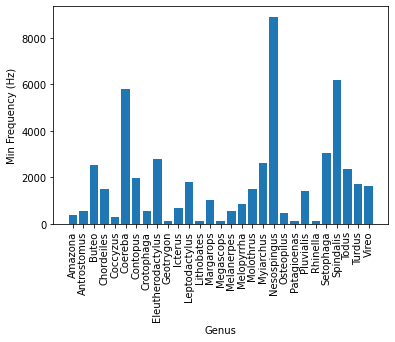

In [ ]:
plt.bar(genus_desc.index, height = genus_desc["Min Frequency (Hz)"]["mean"])
plt.xticks(rotation=90)
plt.xlabel("Genus")
plt.ylabel("Min Frequency (Hz)")
plt.show()

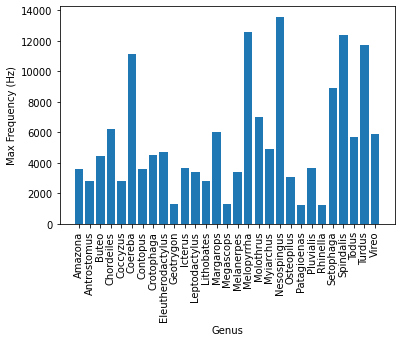

In [ ]:
plt.bar(genus_desc.index, height = genus_desc["Max Frequency (Hz)"]["mean"])
plt.xticks(rotation=90)
plt.xlabel("Genus")
plt.ylabel("Max Frequency (Hz)")
plt.show()

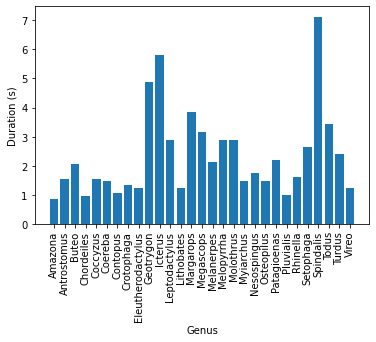

In [ ]:
plt.bar(genus_desc.index, height = genus_desc["Duration (s)"]["mean"])
plt.xticks(rotation=90)
plt.xlabel("Genus")
plt.ylabel("Duration (s)")
plt.show()

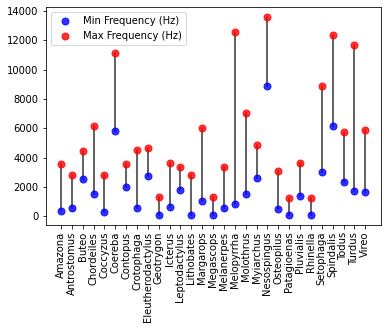

In [ ]:
# Define data

x = [i for i in range(genus_desc.shape[0])]
y = [(genus_desc["Min Frequency (Hz)"]["mean"][i], 
      genus_desc["Max Frequency (Hz)"]["mean"][i]) for i in range(genus_desc.shape[0]) ]
# # Vertical line

plt.plot((x,x),([i for (i,j) in y], [j for (i,j) in y]),c='black', alpha=0.8)

# Plot 

plt.plot(x, [i for (i,j) in y], 'bo', markersize = 7, label="Min Frequency (Hz)", alpha=0.8)
plt.plot(x, [j for (i,j) in y], 'ro', markersize = 7, label="Max Frequency (Hz)", alpha=0.8)

plt.xticks(ticks = x, labels = genus_desc.index.tolist(), rotation=90)
plt.legend()
# Display

plt.show()

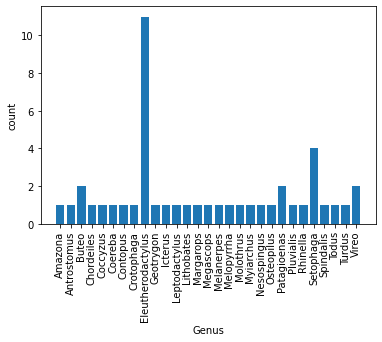

In [ ]:
plt.bar(genus_desc.index, height = genus_desc["Duration (s)"]["count"])
plt.xticks(rotation=90)
plt.xlabel("Genus")
plt.ylabel("count")
plt.show()

In [ ]:
recording_meta

,recording_id,site_id,datetime,sample_rate,lat,lon
0,13796701,9021,2021-03-03 11:05:00,48000,18.19754,-65.71168
1,13796756,9021,2021-03-03 11:35:00,48000,18.19754,-65.71168
2,13797384,9021,2021-03-03 17:15:00,48000,18.19754,-65.71168
3,13797565,9021,2021-03-03 18:25:00,48000,18.19754,-65.71168
4,13797795,8769,2021-03-02 14:25:00,48000,18.02644,-66.68633
...,...,...,...,...,...,...
26384,31780855,20842,2021-05-30 12:05:00,48000,18.36220,-65.67378
26385,31790874,20841,2021-05-16 05:35:00,48000,18.08711,-67.92334
26386,31790885,20841,2021-05-16 05:55:00,48000,18.08711,-67.92334
26387,31790888,20841,2021-05-16 06:40:00,48000,18.08711,-67.92334


In [ ]:
recording_meta['time'] = recording_meta['datetime'].str.split(" ").str[1]
recording_meta['year'] = recording_meta['datetime'].str.split(" ").str[0].str.split("-").str[0]
recording_meta['month'] = recording_meta['datetime'].str.split(" ").str[0].str.split("-").str[1]
recording_meta['day'] = recording_meta['datetime'].str.split(" ").str[0].str.split("-").str[2]
recording_meta['hour'] = recording_meta['time'].str.split(":").str[0].astype(int)

In [ ]:
recording_meta

,recording_id,site_id,datetime,sample_rate,lat,lon,time,year,month,day,hour
0,13796701,9021,2021-03-03 11:05:00,48000,18.19754,-65.71168,11:05:00,2021,03,03,11
1,13796756,9021,2021-03-03 11:35:00,48000,18.19754,-65.71168,11:35:00,2021,03,03,11
2,13797384,9021,2021-03-03 17:15:00,48000,18.19754,-65.71168,17:15:00,2021,03,03,17
3,13797565,9021,2021-03-03 18:25:00,48000,18.19754,-65.71168,18:25:00,2021,03,03,18
4,13797795,8769,2021-03-02 14:25:00,48000,18.02644,-66.68633,14:25:00,2021,03,02,14
...,...,...,...,...,...,...,...,...,...,...,...
26384,31780855,20842,2021-05-30 12:05:00,48000,18.36220,-65.67378,12:05:00,2021,05,30,12
26385,31790874,20841,2021-05-16 05:35:00,48000,18.08711,-67.92334,05:35:00,2021,05,16,5
26386,31790885,20841,2021-05-16 05:55:00,48000,18.08711,-67.92334,05:55:00,2021,05,16,5
26387,31790888,20841,2021-05-16 06:40:00,48000,18.08711,-67.92334,06:40:00,2021,05,16,6


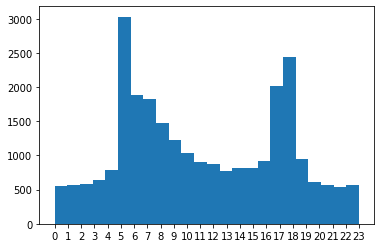

In [ ]:
plt.hist(recording_meta['hour'], bins=24)
plt.xticks(np.arange(0,24, step=1))
plt.show()

(array([681., 166.,  14.,   9.,   6.,   1.,   1.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   1.]),
 array([  1.  ,  31.15,  61.3 ,  91.45, 121.6 , 151.75, 181.9 , 212.05,
        242.2 , 272.35, 302.5 , 332.65, 362.8 , 392.95, 423.1 , 453.25,
        483.4 , 513.55, 543.7 , 573.85, 604.  ]),
 <a list of 20 Patch objects>)

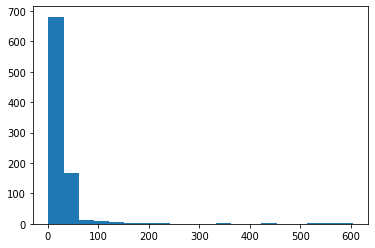

In [ ]:
siteid_count = recording_meta.groupby(["site_id"]).count()["recording_id"]
plt.hist(siteid_count, bins=20)


In [ ]:
recording_meta_count = recording_meta.groupby(['lat', 'lon']).size().to_frame().reset_index()
recording_meta_count = recording_meta_count.rename(columns={0:"count"})
fig = px.density_mapbox(recording_meta_count, lat='lat', lon='lon', z="count", radius=3,
                        center=dict(lat=18.23, lon=-66.6), zoom=7.5,range_color=(1,100),
                        mapbox_style="stamen-terrain")
fig.show()

In [ ]:
id_to_genus_spe = {}
id_to_np = {}
p_path = "/content/drive/Shareddrives/AC297r Project - RFCx /data/train/audio/p" 
for genus_spe in os.listdir(p_path):
    if genus_spe != '.DS_Store':
        for radio in os.listdir(p_path + "//"+genus_spe):
            radio_id = radio.split("_")[0]
            id_to_genus_spe[int(radio_id)] = genus_spe
            id_to_np[int(radio_id)] = "p"
        
n_path = "/content/drive/Shareddrives/AC297r Project - RFCx /data/train/audio/n_full" 
for genus_spe in os.listdir(n_path):
    if genus_spe != '.DS_Store':
        for radio in os.listdir(n_path + "//"+genus_spe):
            radio_id = radio.split("_")[0]
            id_to_genus_spe[int(radio_id)] = genus_spe
            id_to_np[int(radio_id)] = "n"

In [ ]:
recording_meta["Class"] = None
recording_meta["Positive"] = None
for i in range(recording_meta.shape[0]):
    if recording_meta.loc[i, "recording_id"] in id_to_genus_spe:
        recording_meta.loc[i, "Class"] = id_to_genus_spe[recording_meta.loc[i, "recording_id"]]
        recording_meta.loc[i, "Positive"] = (id_to_np[recording_meta.loc[i, "recording_id"]] == "p")

In [ ]:
recording_meta

,recording_id,site_id,datetime,sample_rate,lat,lon,time,year,month,day,hour,Class,Positive
0,13796701,9021,2021-03-03 11:05:00,48000,18.19754,-65.71168,11:05:00,2021,03,03,11,None,None
1,13796756,9021,2021-03-03 11:35:00,48000,18.19754,-65.71168,11:35:00,2021,03,03,11,None,None
2,13797384,9021,2021-03-03 17:15:00,48000,18.19754,-65.71168,17:15:00,2021,03,03,17,None,None
3,13797565,9021,2021-03-03 18:25:00,48000,18.19754,-65.71168,18:25:00,2021,03,03,18,None,None
4,13797795,8769,2021-03-02 14:25:00,48000,18.02644,-66.68633,14:25:00,2021,03,02,14,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26384,31780855,20842,2021-05-30 12:05:00,48000,18.36220,-65.67378,12:05:00,2021,05,30,12,None,None
26385,31790874,20841,2021-05-16 05:35:00,48000,18.08711,-67.92334,05:35:00,2021,05,16,5,None,None
26386,31790885,20841,2021-05-16 05:55:00,48000,18.08711,-67.92334,05:55:00,2021,05,16,5,Patagioenas_leucocephala,True
26387,31790888,20841,2021-05-16 06:40:00,48000,18.08711,-67.92334,06:40:00,2021,05,16,6,None,None


In [ ]:
recording_meta_full = recording_meta.merge(class_meta,how="left", on="Class")
recording_meta_full.to_csv("/content/drive/Shareddrives/AC297r Project - RFCx /data/train/recording_meta_merged.csv", index=False)

In [ ]:
recording_meta_full

,recording_id,site_id,datetime,sample_rate,lat,lon,time,year,month,day,hour,Class,Positive,Min Frequency (Hz),Max Frequency (Hz),Duration (s),genus,species
0,13796701,9021,2021-03-03 11:05:00,48000,18.19754,-65.71168,11:05:00,2021,03,03,11,None,None,NaN,NaN,NaN,NaN,NaN
1,13796756,9021,2021-03-03 11:35:00,48000,18.19754,-65.71168,11:35:00,2021,03,03,11,None,None,NaN,NaN,NaN,NaN,NaN
2,13797384,9021,2021-03-03 17:15:00,48000,18.19754,-65.71168,17:15:00,2021,03,03,17,None,None,NaN,NaN,NaN,NaN,NaN
3,13797565,9021,2021-03-03 18:25:00,48000,18.19754,-65.71168,18:25:00,2021,03,03,18,None,None,NaN,NaN,NaN,NaN,NaN
4,13797795,8769,2021-03-02 14:25:00,48000,18.02644,-66.68633,14:25:00,2021,03,02,14,None,None,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26384,31780855,20842,2021-05-30 12:05:00,48000,18.36220,-65.67378,12:05:00,2021,05,30,12,None,None,NaN,NaN,NaN,NaN,NaN
26385,31790874,20841,2021-05-16 05:35:00,48000,18.08711,-67.92334,05:35:00,2021,05,16,5,None,None,NaN,NaN,NaN,NaN,NaN
26386,31790885,20841,2021-05-16 05:55:00,48000,18.08711,-67.92334,05:55:00,2021,05,16,5,Patagioenas_leucocephala,True,93.75,1218.75,1.749333,Patagioenas,leucocephala
26387,31790888,20841,2021-05-16 06:40:00,48000,18.08711,-67.92334,06:40:00,2021,05,16,6,None,None,NaN,NaN,NaN,NaN,NaN


### Amazona vittata
![image.png](attachment:image.png)

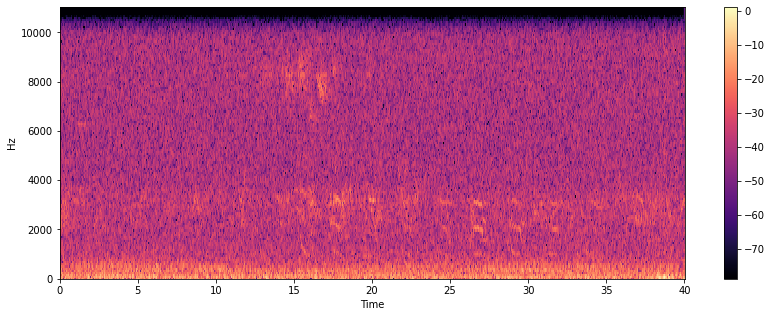

In [ ]:
import librosa 
import librosa.display

import matplotlib.pyplot as plt

audio_path = '/content/drive/Shareddrives/AC297r Project - RFCx /data/train/audio/p/Amazona_vittata/26229134_45.61-46.46.wav'
x , sr = librosa.load(audio_path)

X = librosa.stft(x, n_fft=256)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()


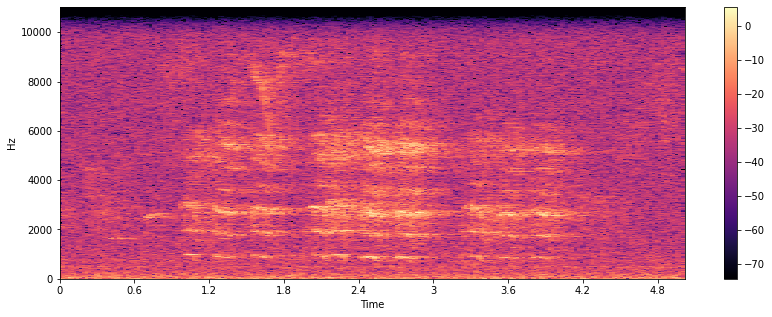

In [ ]:
audio_path = '/content/drive/Shareddrives/AC297r Project - RFCx /data/train/audio/p/Amazona_vittata/26293073_25.6-26.46.wav'
x , sr = librosa.load(audio_path)

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()


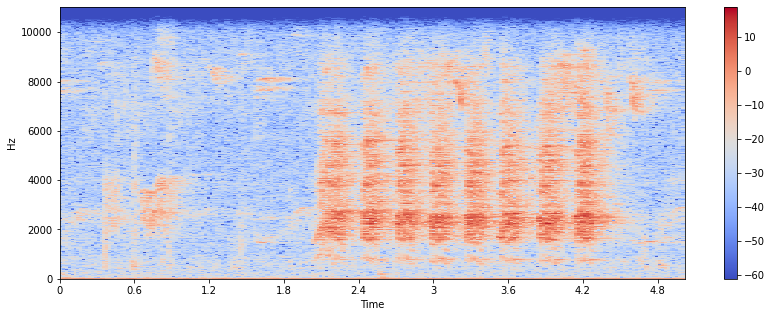

In [ ]:
audio_path = '/content/drive/Shareddrives/AC297r Project - RFCx /data/train/audio/p/Amazona_vittata/26278860_46.77-47.63.wav'
x , sr = librosa.load(audio_path)

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X)) # log scale 
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()


### Icterus icterus 
![image.png](attachment:image.png)

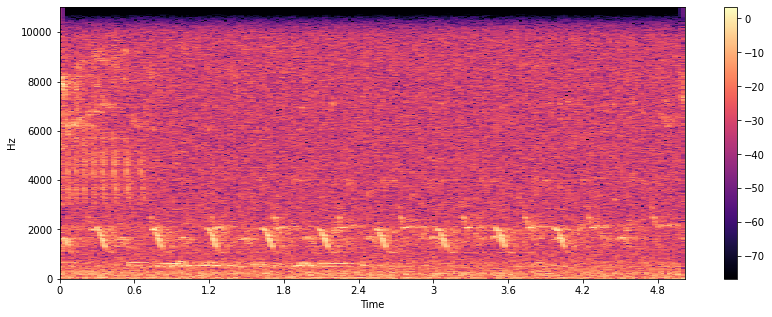

In [ ]:
import librosa 
import librosa.display

import matplotlib.pyplot as plt

audio_path = '/content/drive/Shareddrives/AC297r Project - RFCx /data/train/audio/p/Icterus_icterus/30478696_24.03-29.83.wav'
x , sr = librosa.load(audio_path)

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()


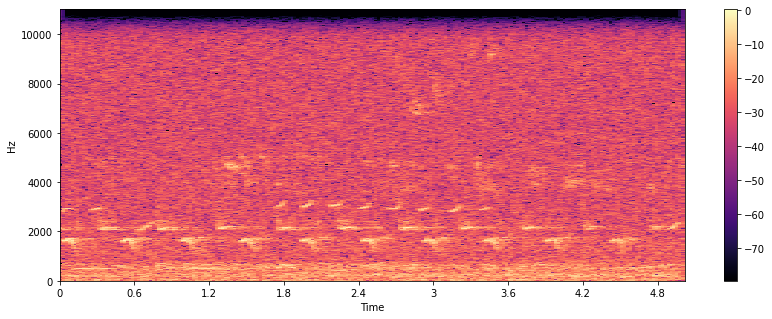

In [ ]:
import librosa 
import librosa.display

import matplotlib.pyplot as plt

audio_path = '/content/drive/Shareddrives/AC297r Project - RFCx /data/train/audio/p/Icterus_icterus/30487449_8.81-14.61.wav'
x , sr = librosa.load(audio_path)

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()


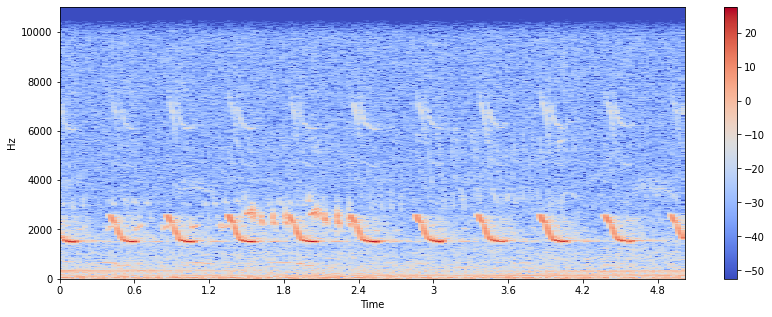

In [ ]:
import librosa 
import librosa.display

import matplotlib.pyplot as plt

audio_path = '/content/drive/Shareddrives/AC297r Project - RFCx /data/train/audio/p/Icterus_icterus/28751482_13.82-19.63.wav'
x , sr = librosa.load(audio_path)

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()


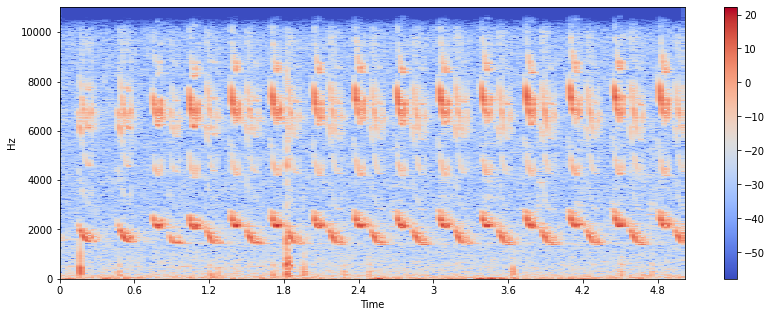

In [ ]:
import librosa 
import librosa.display

import matplotlib.pyplot as plt

audio_path = '/content/drive/Shareddrives/AC297r Project - RFCx /data/train/audio/p/Icterus_icterus/28745733_34.6-40.4.wav'
x , sr = librosa.load(audio_path)

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()


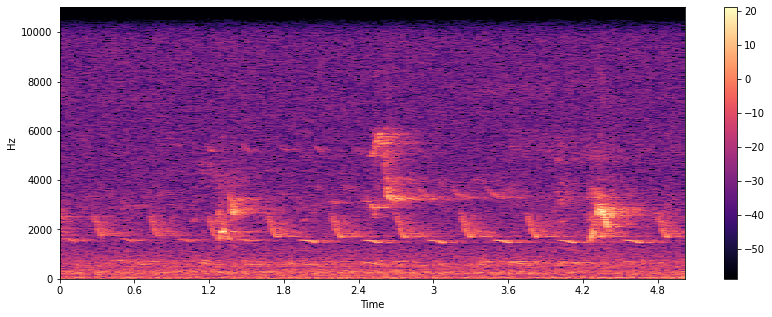

In [ ]:
audio_path = '/content/drive/Shareddrives/AC297r Project - RFCx /data/train/audio/p/Icterus_icterus/27628475_22.91-28.71.wav'
x , sr = librosa.load(audio_path)

X = librosa.stft(x, n_fft=2048)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()


* average image 
* consistency vs variation of p / n samples 
* librosa.stft function: different params 

**Average Frequency Spectrum for Each Class**  
p/n   class  average frequency (length: 110250)

In [ ]:
ave_freq_class = []

p_path = "/content/drive/Shareddrives/AC297r Project - RFCx /data/train/audio//p" 
for genus_spe in os.listdir(p_path):
    if genus_spe != '.DS_Store':
        freq = []
        for radio in os.listdir(p_path + "//"+genus_spe):
            x , sr = librosa.load(p_path + "//"+genus_spe + "//" + radio)
            freq.append(list(x))
        ave = np.mean(freq, axis = 0)

        ave_freq_class.append(['p', genus_spe] + list(ave))

[]

In [ ]:
ave_freq_class = []
p_path = "/content/drive/Shareddrives/AC297r Project - RFCx /data/train/audio/n_full" 
for genus_spe in os.listdir(p_path):
    if genus_spe != '.DS_Store':
        freq = []
        for radio in os.listdir(p_path + "//"+genus_spe):
            x , sr = librosa.load(p_path + "//"+genus_spe + "//" + radio)
            freq.append(list(x))
        ave = np.mean(freq, axis = 0)
        print(genus_spe)
        print(ave)

        ave_freq_class.append(['n', genus_spe] + list(ave))

Setophaga_discolor
nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



TypeError: ignored

In [ ]:
average_freq_df = pd.DataFrame(ave_freq_class, columns = ['Positive', 'Class' ] + [f"t{i}" for i in range(1, 110251)])
average_freq_df.to_csv("/content/drive/Shareddrives/AC297r Project - RFCx /data/train/average_freq_df.csv")

In [ ]:
average_freq_df = pd.read_csv("/content/drive/Shareddrives/AC297r Project - RFCx /data/train/average_freq_df.csv")

FileNotFoundError: ignored

In [ ]:
average_freq_df.head()

NameError: ignored

In [ ]:
class_input = 'Setophaga_angelae'
ave_p = average_freq_df.loc[((average_freq_df.Class == class_input) &(average_freq_df.Positive == 'p')) ,:]
ave_p = np.array(ave_p.iloc[:,2:])[0]
ave_n = average_freq_df.loc[((average_freq_df.Class == class_input) &(average_freq_df.Positive == 'n')) ,:]
ave_n = np.array(ave_n.iloc[:,2:])[0]

Xdb_p = librosa.amplitude_to_db(abs(librosa.stft(ave_p)))
Xdb_n = librosa.amplitude_to_db(abs(librosa.stft(ave_n)))
fig, axes = plt.subplots(1,2, figsize=(14, 5))
img = librosa.display.specshow(Xdb_p, sr=sr, x_axis='time', y_axis='hz',ax =axes[0])
axes[0].set(title = f'average frequency of {class_input} (positive)')
librosa.display.specshow(Xdb_n, sr=sr, x_axis='time', y_axis='hz',ax =axes[1])
axes[1].set(title = f'average frequency of {class_input} (negative)')
fig.colorbar(img, ax=axes, format="%+2.f dB")

NameError: ignored

NameError: ignored

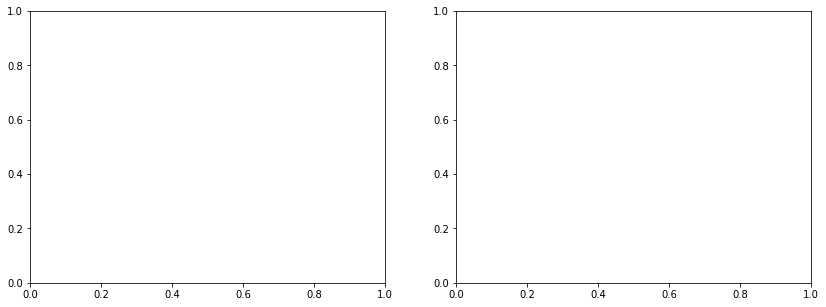

In [ ]:

fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(ave_p)
axes[0].set(title = f'average amplitute of {class_input} (positive)')
axes[1].plot(ave_n)
axes[1].set(title = f'average amplitute of {class_input} (negative)')

**consistency vs variation of p / n samples**  

In [ ]:
average_freq_df.head()

NameError: ignored

In [ ]:
var_class_df = pd.concat( [average_freq_df.iloc[:,0:2], np.mean(average_freq_df.iloc[:,2:], axis = 1), np.var(average_freq_df.iloc[:,2:], axis = 1)], axis = 1)
var_class_df.columns = ["Positive", "Class","mean_freq", "var_freq"]
var_class_df = var_class_df.sort_values(by = ["Class", "Positive"]).reset_index(drop = True)
var_class_df

NameError: ignored

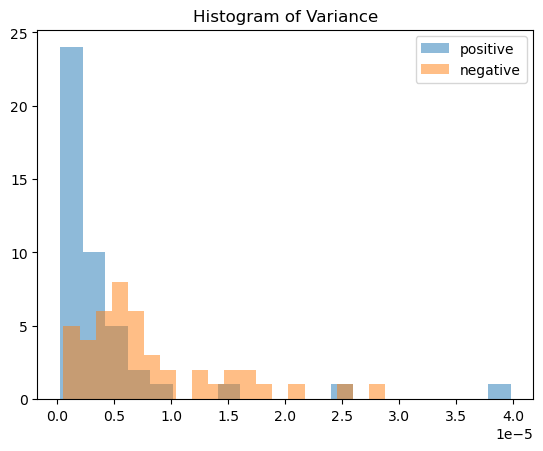

In [ ]:
plt.hist(var_class_df.loc[var_class_df.Positive == 'p', 'var_freq'], bins =20, label ='positive', alpha = 0.5)
plt.hist(var_class_df.loc[var_class_df.Positive == 'n', 'var_freq'], bins =20, label ='negative', alpha = 0.5)
plt.title('Histogram of Variance')
plt.legend()

Text(0.5, 1.0, 'Average Variance of Negative and Positive Smaples')

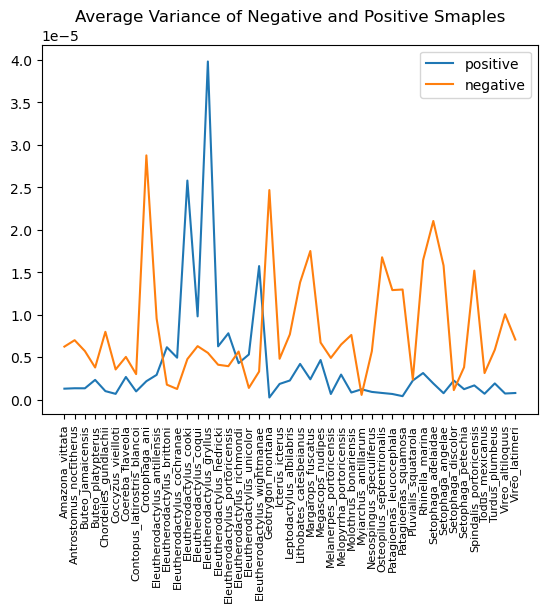

In [ ]:
class_list = var_class_df.loc[var_class_df.Positive == 'p',].sort_values('Class').Class
plt.plot(range(45),var_class_df.loc[var_class_df.Positive == 'p',].sort_values('Class').var_freq, label = 'positive')
plt.xticks(ticks = range(45), labels = class_list, rotation = 90, fontsize =8)
plt.plot(range(45),var_class_df.loc[var_class_df.Positive == 'n',].sort_values('Class').var_freq, label = 'negative')
plt.legend()
plt.title("Average Variance of Negative and Positive Smaples")

Text(0.5, 1.0, 'Average Mean of Negative and Positive Smaples')

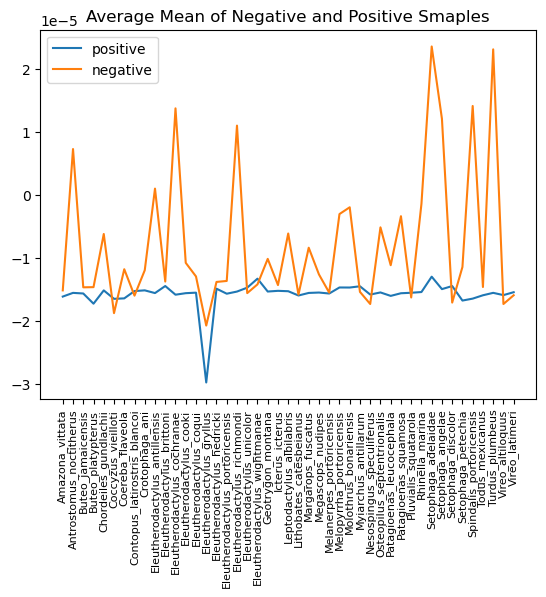

In [ ]:
class_list = var_class_df.loc[var_class_df.Positive == 'p',].sort_values('Class').Class
plt.plot(range(45),var_class_df.loc[var_class_df.Positive == 'p',].sort_values('Class').mean_freq, label = 'positive')
plt.xticks(ticks = range(45), labels = class_list, rotation = 90, fontsize =8)
plt.plot(range(45),var_class_df.loc[var_class_df.Positive == 'n',].sort_values('Class').mean_freq, label = 'negative')
plt.legend()
plt.title("Average Mean of Negative and Positive Smaples")